<a id='1'></a>
# 1. Getting Started- Loading the data and python packages

<a id='1.1'></a>
## 1.1. Loading the python packages

In [ ]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.svm import NuSVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import Pipeline
from scipy.stats import spearmanr
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

#Download and import Ta-lib
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
!tar -xzvf ta-lib-0.4.0-src.tar.gz
%cd ta-lib
!./configure --prefix=/usr
!make
!make install
!pip install Ta-Lib

In [ ]:
from pandas_datareader import data as pdr
from datetime import datetime
import pandas as pd
!pip install yfinance
import yfinance as yf
yf.pdr_override()
#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf

In [ ]:
import matplotlib.pyplot as plt                 
import seaborn as sns                           
sns.set()

from dateutil.relativedelta import relativedelta 
from scipy.optimize import minimize              
!pip install pmdarima 
import pmdarima as pm
import statsmodels.formula.api as smf           
import statsmodels.tsa.api as smt
import statsmodels.api as sm
import statsmodels.stats as sms
from statsmodels.tsa.arima_model import ARIMA
from statsmodels.tsa.stattools import adfuller
from keras.models import Sequential

import sklearn.metrics as metrics
from tensorflow.keras.layers import LSTM
import scipy.stats as scs
from scipy.fftpack import fft

from itertools import product                   
from tqdm import tqdm_notebook

import warnings                                 
warnings.filterwarnings('ignore')

%matplotlib inline

     |████████████████████████████████| 1.4 MB 8.6 MB/s 
     |████████████████████████████████| 9.8 MB 13.0 MB/s 
  Attempting uninstall: statsmodels
    Found existing installation: statsmodels 0.10.2
    Uninstalling statsmodels-0.10.2:
      Successfully uninstalled statsmodels-0.10.2


In [ ]:
#Diable the warnings
import warnings
warnings.filterwarnings('ignore')

<a id='1.2'></a>
## 1.2. Loading the Data

Next, we extract the data required for our analysis using pandas datareader. 

In [ ]:
start_date = '2005-01-01' 
end_date = datetime.now() 

stk_tickers = ['AAPL', 'IBM', 'FB']
ccy_tickers = ['USDJPY=X', 'DXS.AX']
idx_tickers = ['^GSPC', 'DJI']

stk_data = pdr.get_data_yahoo(stk_tickers, start=start_date, end=end_date)
ccy_data = pdr.get_data_yahoo(ccy_tickers, start=start_date, end=end_date)
idx_data = pdr.get_data_yahoo(idx_tickers, start=start_date, end=end_date)

stk_data = stk_data.sort_values(by='Date')
stk_data_Adj = stk_data['Adj Close']
close = stk_data['Close']['AAPL']
high = stk_data['High']['AAPL']
low = stk_data['Low']['AAPL']

ccy_data = ccy_data.sort_values(by='Date')
ccy_data = ccy_data['Adj Close']

idx_data = idx_data.sort_values(by='Date')
idx_data = idx_data['Adj Close']

[*********************100%***********************]  3 of 3 completed
[*********************100%***********************]  2 of 2 completed
[*********************100%***********************]  2 of 2 completed


Next, we need a series to predict. We choose to predict using weekly returns. We approximate this by using 5 business day period returns.

In [ ]:
return_period = 5

We now define our Y series and our X series

Y: AAPL **Future** Returns

X:

    a. IBM 5 Business Day Returns
    b. Facebook 5 Business DayReturns    
    c. USD/JPY 5 Business DayReturns    
    d. GBP/USD 5 Business DayReturns    
    e. S&P 500 5 Business DayReturns    
    f. Dow Jones 5 Business DayReturns    
    g. AAPL 5 Business Day Returns    
    h. AAPL 15 Business Day Returns    
    i. AAPL 30 Business Day Returns    
    j. AAPL 60 Business Day Returns
    k. SMA 15 days moving average
    l. Corr SMA correlation
    m. Ta-lib factor: RSI, SAR, ADX
    n. CC difference between today's Adj Close and 5 days ago
    o. OC difference between today's open and close price
    p. 5-day return feature with lag n = 15


We remove the AAPL past returns when we use the Time series models.

In [ ]:
import talib as ta

n=15
df = pd.DataFrame()
df['SMA'] = stk_data_Adj['AAPL'].rolling(window = n).mean()
df['Corr']= stk_data_Adj['AAPL'].rolling(window = n).corr(df['SMA'])

df['RSI']=ta.RSI(np.array(stk_data_Adj['AAPL']), timeperiod = n)
df['SAR']=ta.SAR(np.array(high),np.array(low), 0.2,0.2)
df['ADX']=ta.ADX(np.array(high),np.array(low), np.array(stk_data['Open']['AAPL']), timeperiod = n)
df['CC']= stk_data['Adj Close']['AAPL']-stk_data['Adj Close']['AAPL'].shift(5)
df['OC']= stk_data['Open']['AAPL']-close

In [ ]:
for n in list(range(0,15)):
    name = 'lag_ret' + str(n)
    df[name] =  np.log(stk_data_Adj['AAPL']).diff(5).shift(n).fillna(0)

In [ ]:
Y = pd.DataFrame(np.log(stk_data_Adj['AAPL']).diff(return_period).shift(-return_period), columns = ['AAPL'])

X1 = np.log(stk_data_Adj.loc[:, ('IBM', 'FB')]).diff(return_period)
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

X4 = pd.concat([np.log(stk_data_Adj.loc[:, 'AAPL']).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1)
X4.columns = ['AAPL_DT', 'AAPL_3DT', 'AAPL_6DT', 'AAPL_12DT']

X = pd.concat([X1, X2, X3, X4, df], axis=1)
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]
X = dataset.drop('AAPL', axis=1)
Y = dataset[['AAPL']]
Y_other_form = Y.loc[:, 'AAPL']

<a id='2'></a>
# 2. Exploratory Data Analysis

<a id='2.1'></a>
## 2.1. Descriptive Statistics

Lets have a look at the dataset we have

In [ ]:
pd.set_option('precision', 3)
dataset.describe()

,AAPL,IBM,FB,DXS.AX,USDJPY=X,DJI,^GSPC,AAPL_DT,AAPL_3DT,AAPL_6DT,AAPL_12DT,SMA,Corr,RSI,SAR,ADX,CC,OC,lag_ret0,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5,lag_ret6,lag_ret7,lag_ret8,lag_ret9,lag_ret10,lag_ret11,lag_ret12,lag_ret13,lag_ret14
count,421.000,4.210e+02,421.000,421.000,4.210e+02,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000,421.000
mean,0.004,-1.535e-04,0.003,0.003,6.629e-04,0.002,0.002,0.003,0.010,0.021,0.048,45.645,0.367,54.668,47.563,26.173,0.165,0.026,0.003,0.005,0.004,0.004,0.004,0.004,0.003,0.005,0.004,0.004,0.004,0.004,0.005,0.004,0.003
std,0.038,3.301e-02,0.054,0.029,1.229e-02,0.024,0.023,0.038,0.067,0.099,0.135,38.308,0.503,12.905,37.924,10.304,2.496,0.932,0.038,0.038,0.038,0.037,0.038,0.039,0.039,0.038,0.038,0.039,0.039,0.038,0.039,0.038,0.038
min,-0.166,-2.312e-01,-0.293,-0.281,-4.802e-02,-0.209,-0.198,-0.166,-0.255,-0.328,-0.452,12.891,-0.931,22.311,13.888,8.392,-17.770,-3.070,-0.166,-0.134,-0.134,-0.120,-0.193,-0.166,-0.134,-0.134,-0.120,-0.193,-0.166,-0.134,-0.134,-0.120,-0.193
25%,-0.018,-1.463e-02,-0.023,-0.013,-6.188e-03,-0.008,-0.006,-0.019,-0.024,-0.035,-0.021,21.571,-0.008,44.898,23.857,18.418,-0.608,-0.282,-0.019,-0.016,-0.016,-0.015,-0.017,-0.017,-0.018,-0.016,-0.018,-0.017,-0.017,-0.017,-0.016,-0.018,-0.016
50%,0.006,2.449e-03,0.004,0.005,7.393e-04,0.004,0.004,0.007,0.015,0.033,0.058,28.719,0.517,54.864,31.477,24.420,0.182,0.003,0.007,0.006,0.005,0.006,0.006,0.008,0.006,0.004,0.006,0.006,0.007,0.006,0.004,0.006,0.006
75%,0.026,1.716e-02,0.030,0.020,7.282e-03,0.013,0.014,0.027,0.056,0.088,0.129,47.423,0.802,64.729,49.423,32.301,0.777,0.264,0.027,0.027,0.026,0.025,0.027,0.026,0.028,0.026,0.026,0.027,0.026,0.027,0.027,0.026,0.025
max,0.147,1.270e-01,0.365,0.071,5.316e-02,0.116,0.099,0.147,0.199,0.303,0.450,159.688,0.983,90.116,163.832,67.643,14.878,6.870,0.147,0.162,0.139,0.137,0.169,0.147,0.162,0.139,0.137,0.169,0.147,0.162,0.139,0.137,0.169


In [ ]:
dataset.head()

,AAPL,IBM,FB,DXS.AX,USDJPY=X,DJI,^GSPC,AAPL_DT,AAPL_3DT,AAPL_6DT,AAPL_12DT,SMA,Corr,RSI,SAR,ADX,CC,OC,lag_ret0,lag_ret1,lag_ret2,lag_ret3,lag_ret4,lag_ret5,lag_ret6,lag_ret7,lag_ret8,lag_ret9,lag_ret10,lag_ret11,lag_ret12,lag_ret13,lag_ret14
Date,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
2012-05-25,0.004,-0.008,-0.181,0.027,0.003,0.007,0.017,0.058,-0.005,-0.074,0.032,17.103,0.255,47.350,19.569,22.939,0.977,0.082,0.058,0.064,0.044,0.007,5.467e-03,-0.066,-0.073,-0.041,-0.027,-1.997e-02,0.003,-0.020,-0.029,-0.024,-0.025
2012-06-04,0.012,-0.030,-0.171,0.000,-0.019,-0.029,-0.031,0.004,-0.004,-0.015,0.040,17.125,-0.491,47.892,20.768,18.229,0.061,-0.100,0.004,-0.008,0.012,0.039,1.939e-02,0.058,0.064,0.044,0.007,5.467e-03,-0.066,-0.073,-0.041,-0.027,-0.020
2012-06-12,0.019,0.028,0.057,-0.016,0.012,0.036,0.030,0.023,0.026,-0.013,-0.016,17.440,0.431,52.722,21.018,14.134,0.408,-0.061,0.023,0.012,0.034,-0.010,-1.340e-02,-0.017,0.004,-0.008,0.012,3.908e-02,0.019,0.058,0.064,0.044,0.007
2012-06-20,-0.019,0.029,0.147,0.005,-0.006,0.026,0.031,0.023,0.011,0.030,-0.036,17.583,0.733,56.896,20.370,12.639,0.416,0.088,0.023,0.019,0.025,-0.011,-3.318e-04,0.001,0.023,0.012,0.034,-1.046e-02,-0.013,-0.017,0.004,-0.008,0.012
2012-06-27,0.060,-0.030,0.020,0.040,0.005,-0.016,-0.018,-0.019,0.005,0.038,-0.074,17.664,0.211,50.202,20.757,10.112,-0.344,0.018,-0.019,-0.027,-0.026,0.014,1.069e-02,0.023,0.019,0.025,-0.011,-3.318e-04,0.001,0.023,0.012,0.034,-0.010


<a id='2.2'></a>
## 2.2. Data Visualization

Next, lets look at the distribution of the data over the entire period

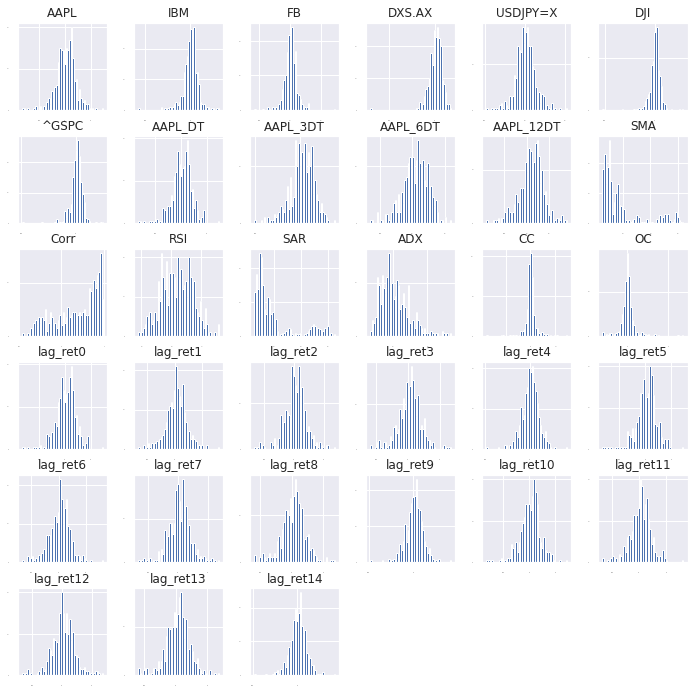

In [ ]:
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

The above histogram shows the distribution for each series individually. Next, lets look at the density distribution over the same x axis scale.

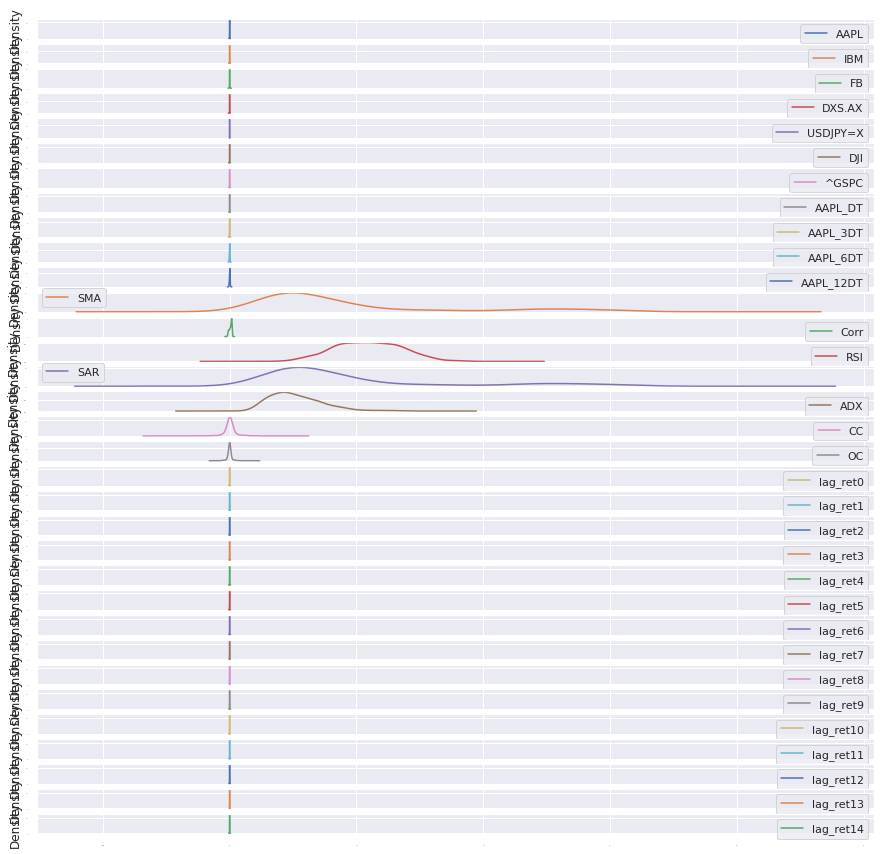

In [ ]:
dataset.plot(kind='density', subplots=True, sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

In order to get a sense of the interdependence of the data we look at the scatter plot and the correlation matrix

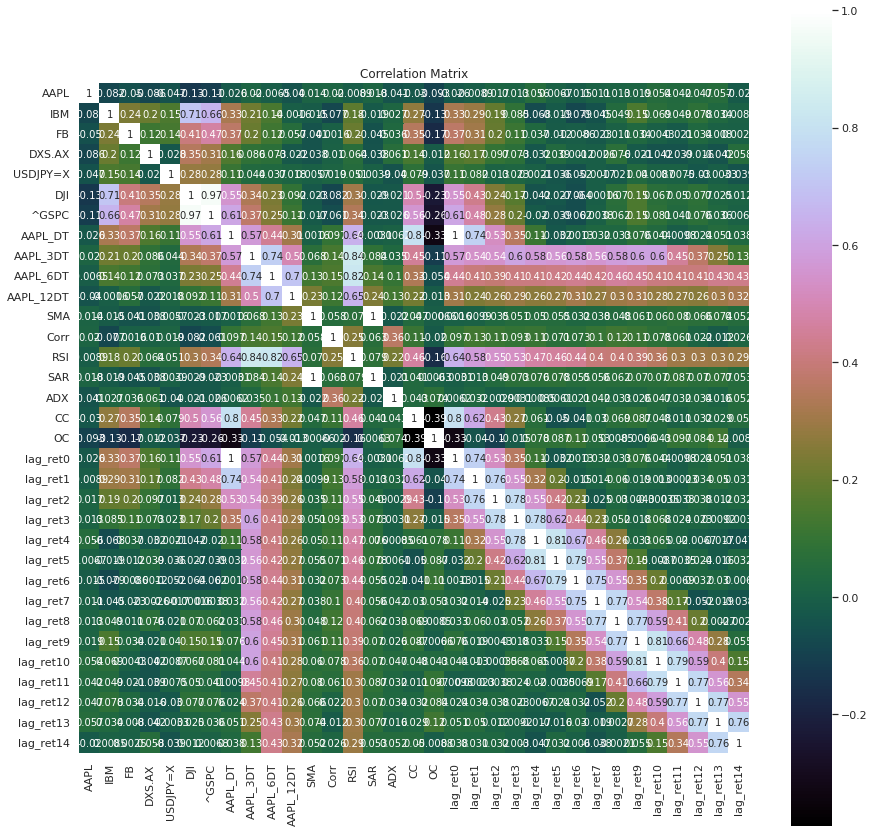

In [ ]:
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

Looking at the correlation plot above, we see some correlation of the predicted variable 

<Figure size 1080x1080 with 0 Axes>

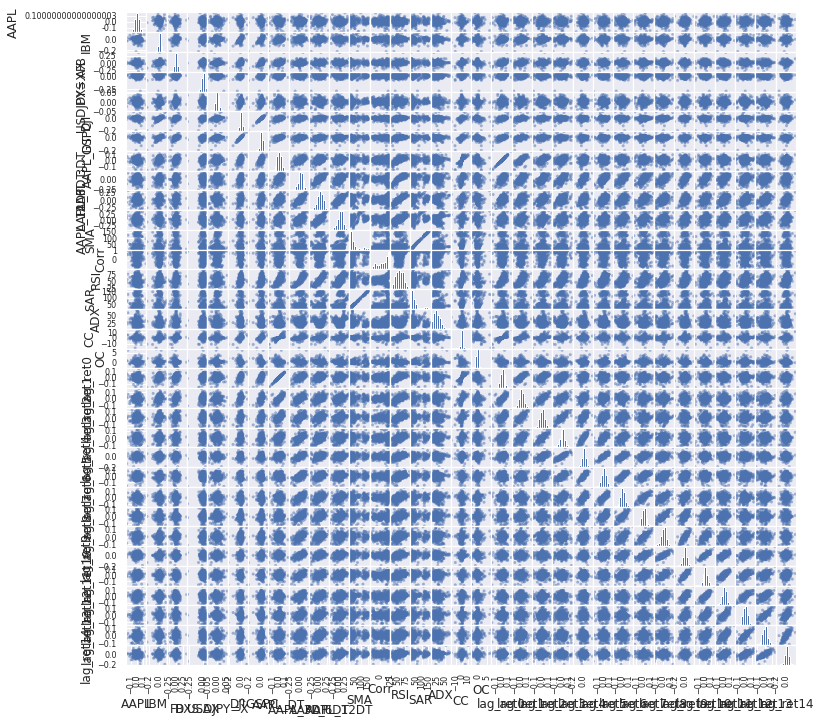

In [ ]:
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()

Looking at the scatter plot above, we see some linear relationship of the predicted variable.

<a id='2.3'></a>
## 2.3. Time Series Analysis 

Before we do any futher process, firsly lets check if our time-series data is stationary or not by applying Dickey-Fuller test.

In [ ]:
result = adfuller(Y_other_form)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -20.252143
p-value: 0.000000


From the above result out of above Dickey-fuller test, where our orignal Null hypothesis(H0): The series behave like Random Walk(not stationary) vs Alternative hypothesis(Ha): The series is stationary. Although the p-value is almost zero and smaller than our significant level, we can reject the null hypothesis and conclude that our oringal series is stationary. There might still exits some seasonality that we need to take into consideration. Therefore, the pre-proccessing of time series analysis is still necessary before we actually fit the model.

Next, we look at the seasonal decomposition of our time series

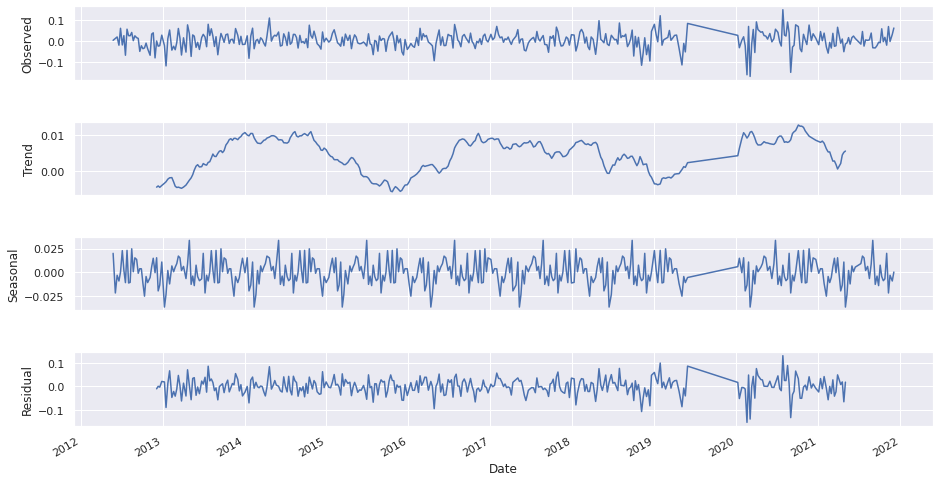

In [ ]:
res = sm.tsa.seasonal_decompose(Y,freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

We can see that for AAPL there has been a general trend upwards. This should show up in our the constant/bias terms in our models

We can do some further time-series analysis here, since we have observe that there exist a clear trend&seasonality, the detrend&deseasonalization maybe necessary to find the order for futher SARIMA model fitment.

In [ ]:
def tsplot(y, lags=None, figsize=(12, 7), style='bmh'):
    """
        Plot time series, its ACF and PACF, calculate Dickey–Fuller test
        
        y - timeseries
        lags - how many lags to include in ACF, PACF calculation
    """
    if not isinstance(y, pd.Series):
        y = pd.Series(y)
        
    with plt.style.context(style):    
        fig = plt.figure(figsize=figsize)
        layout = (2, 2)
        ts_ax = plt.subplot2grid(layout, (0, 0), colspan=2)
        acf_ax = plt.subplot2grid(layout, (1, 0))
        pacf_ax = plt.subplot2grid(layout, (1, 1))
        
        y.plot(ax=ts_ax)
        p_value = sm.tsa.stattools.adfuller(y)[1]
        ts_ax.set_title('Time Series Analysis Plots\n Dickey-Fuller: p={0:.5f}'.format(p_value))
        smt.graphics.plot_acf(y, lags=lags, ax=acf_ax)
        smt.graphics.plot_pacf(y, lags=lags, ax=pacf_ax)
        plt.tight_layout()

In [ ]:
def detrendPrice(dft):
    #make sure the input dft has no Nan, otherwise OLS will break
    # fit linear model
    series=dft.Close
    length = len(series)
    x = np.arange(length)
    y = np.array(series.values)
    x_const = sm.add_constant(x) #need to add intercept constant
    model = sm.OLS(y,x_const)
    results = model.fit()
    predictions = results.predict(x_const)
    resid = y - predictions
    df=pd.DataFrame(resid, columns=['Close'])
    df.index = dft.index
    return df

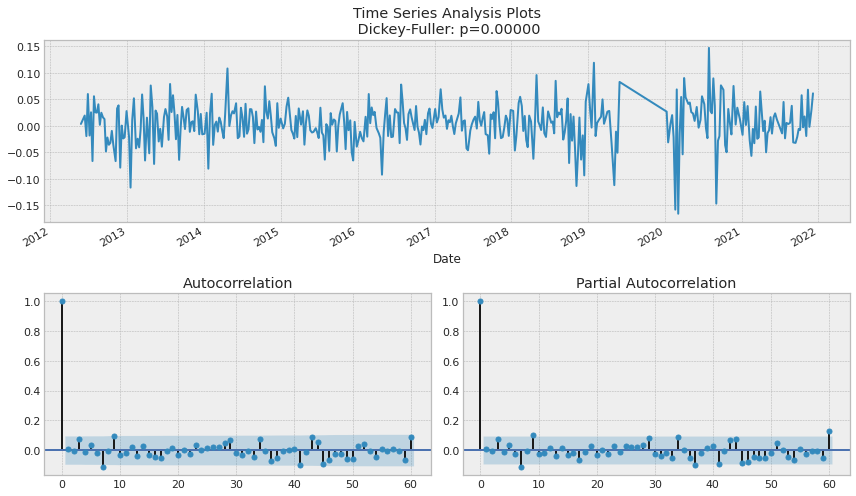

In [ ]:
tsplot(Y_other_form, lags=60)

the series has no trend, no need to detrend. Augmented-Dickey-Fuller(ADF statistic) =p<.05, series is mean reverting
ACF plot: cycle is 24 hours

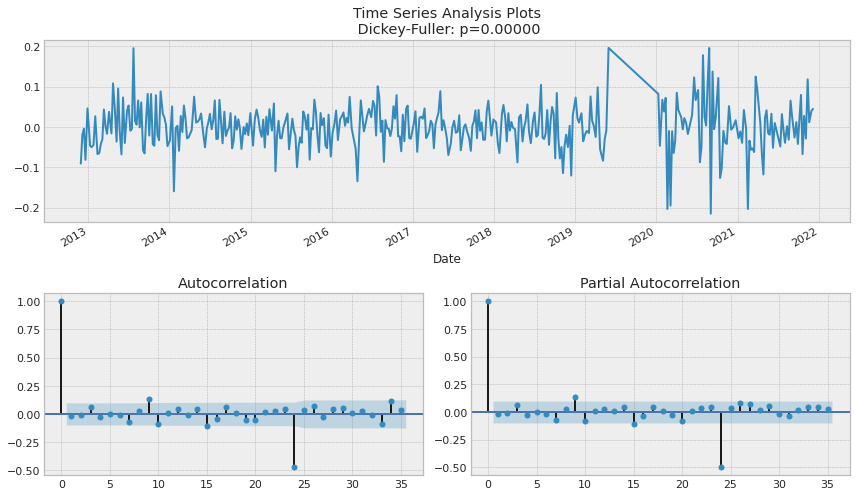

In [ ]:
#we are going to deseasonalize the data and take the residuals and plot them
#ACF plot: the seasonality goes away after deseasonalization has been applied
Y_diff_s = Y_other_form - Y_other_form.shift(24) #deseasonalization
tsplot(Y_diff_s[24+1:], lags=35)

After we remove the seasonality, the series seems much better, we are going to use pmdarima now, "guessing" that the seasonal parameter m=24 hours since we have hourly data.
Therefore, since difference is required and the seasonality is exist, the Seasonal Arima model shoul d be performed. We are going to find the order of SARIMA by using auto_arima function in order to minmize the AIC to find the best order. 

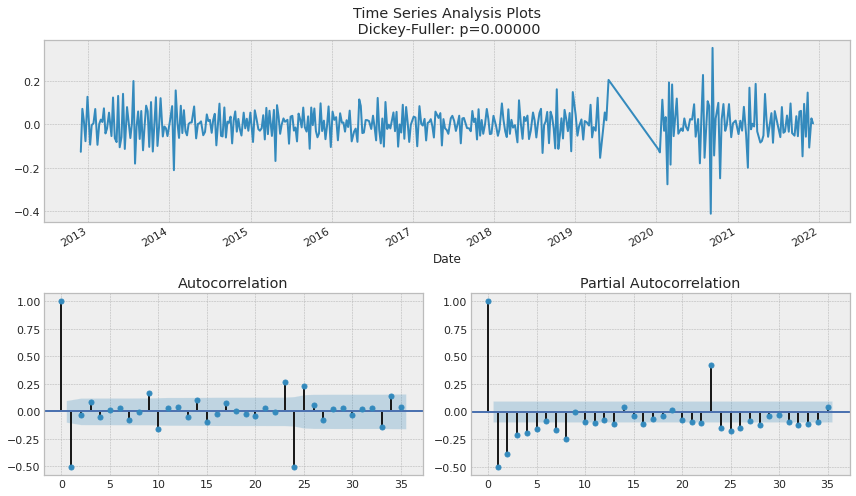

In [ ]:
#We are going to take the first differences and take the residuals and plot them
#ACF plot: looks very much like noise, with little autocorrelation
Y_diff_d = Y_diff_s - Y_diff_s.shift(1) #taking first differences
tsplot(Y_diff_d[24+1:], lags=35)

First order difference is not needed here.

<a id='3'></a>
#3. Data Preparation

<a id='3.2'></a>
## 3.1 Feature Selection

We use sklearn's SelectKBest function to get a sense of feature importance. 

In [ ]:
bestfeatures = SelectKBest(k=24, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)
#concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
featureScores.nlargest(32,'Score').set_index('Specs') #rank features


,Score
Specs,
DJI,6.746
^GSPC,5.335
OC,3.666
DXS.AX,3.117
IBM,2.865
lag_ret13,1.360
lag_ret4,1.342
lag_ret10,1.211
FB,1.057


We see that DJI seems to be the most important feature and AAPL_6DT being the least important.

In [ ]:
#reduce features(keep 24 features)
X = X.drop(columns = ['SMA', 'lag_ret8', 'lag_ret3'	,'lag_ret7', 'RSI', 'lag_ret1', 'lag_ret5', 'AAPL_6DT'])

<a id='4.1'></a>
## 3.2 Train Test Split and Evaluation Metrics

Next, we start by splitting our data in training and testing chunks. If we are going to use Time series models we have to split the data in continous series.

In [ ]:
validation_size = 0.2

#In case the data is not dependent on the time series, then train and test split randomly
# seed = 7
# X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=validation_size, random_state=seed)

#In case the data is not dependent on the time series, then train and test split should be done based on sequential sample
#This can be done by selecting an arbitrary split point in the ordered list of observations and creating two new datasets.
train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

<a id='4'></a>
# 4. Evaluate Algorithms and Models

## 4.1. General Model Performance




In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('LSVR', SVR(kernel = 'linear')))
models.append(('NuSVR', NuSVR()))


#Ensable Models
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [ ]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)

    cv_results = -1*cross_val_score(model, X_train, Y_train.values.ravel(), cv=5, scoring=scoring)
    kfold_results.append(cv_results)

    # Full Training period
    M = model.fit(X_train, Y_train.values.ravel())
    train_result = mean_squared_error(M.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(M.predict(X_test), Y_test)
    test_results.append(test_result)
    
   

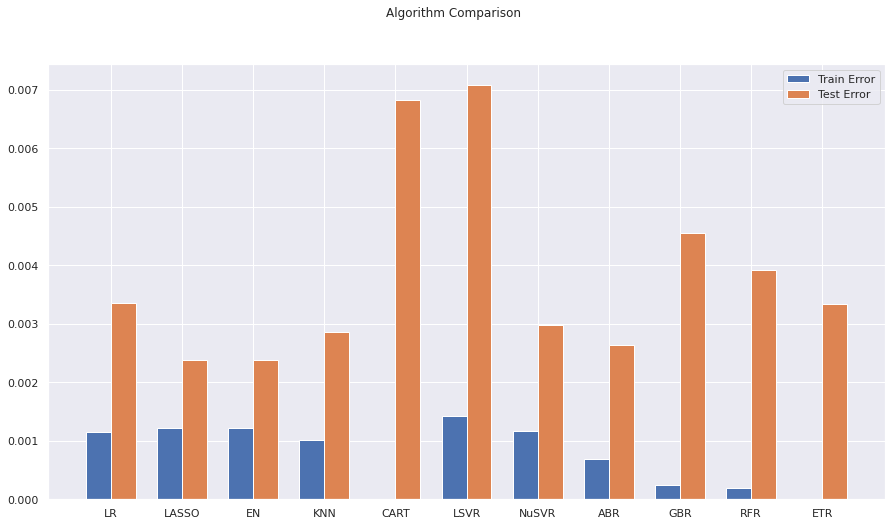

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

## 4.2. random forest regression

In [ ]:
import numpy as np
import pandas as pd
import math
import matplotlib.pyplot as plt
import datetime as dt
import sklearn.model_selection as sm
from sklearn.ensemble import RandomForestRegressor

Use gridsearch to find the best hyperparameters. here use min_samples_split as tuned parameter since it will make the model capturing the noise in the training dataset easily.

In [ ]:
# get the model 
forest = RandomForestRegressor(max_depth = 20, random_state=0)
# apply grid search to find the best hyperparameters
grid = GridSearchCV(forest, {'min_samples_split':[2,10,20,50,100]}, cv=10)
grid.fit(X_train, Y_train)
best_hyper = grid.best_params_
print ("Best f1: {}".format(grid.best_score_))      
print('The best parameter:', best_hyper)

Best f1: -0.08812374657155506
The best parameter: {'min_samples_split': 100}


use the tuned model to fit the trainset and get predict on test set

In [ ]:
RF = RandomForestRegressor(min_samples_split=100, max_depth = 10, random_state=0)
RF.fit(X_train,Y_train)
pred = RF.predict(X_test)

compare the predict result with the true data

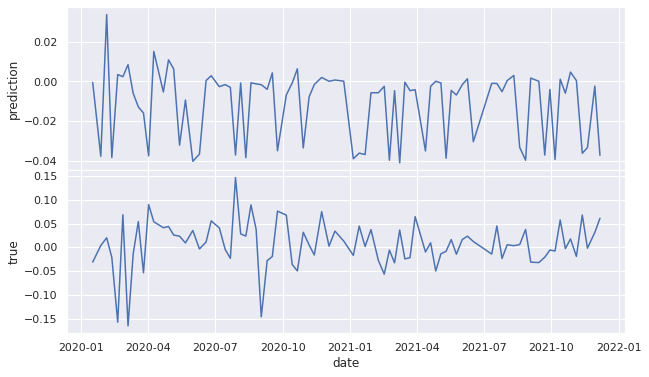

In [ ]:
fig,axs=plt.subplots(2,1,sharex=True,figsize=(10,6))
axs[0].plot(Y_test.index,pred)
axs[0].set_ylabel("prediction")
axs[1].plot(Y_test.index,Y_test)
axs[1].set_ylabel("true")
plt.subplots_adjust(hspace=0)
plt.xlabel('date')
plt.show()
plt.close()

do feature importance to check the degree of influence of a feature on the prediction result. The greater the importance of a feature, the greater the impact of the feature on the prediction result, and the smaller the importance, which indicates that the feature has a smaller effect on the prediction result. The importance of a feature means the average value of the importance of all decision trees within the feature.

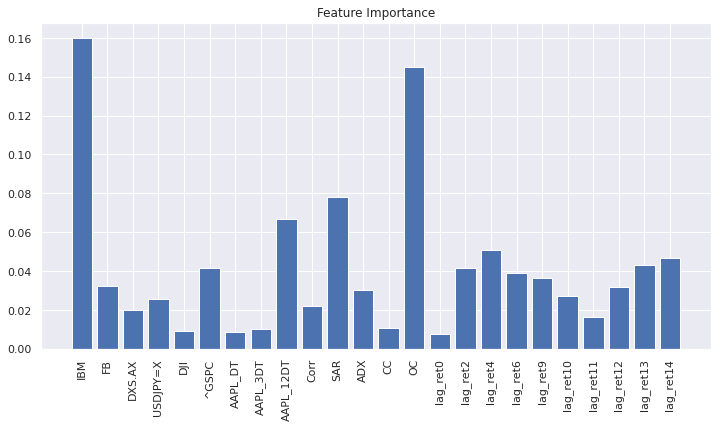

In [ ]:
importances = RF.feature_importances_
plt.figure(figsize=(12,6))
plt.bar(range(X.shape[1]), importances)
plt.title("Feature Importance")
plt.xticks(range(X.shape[1]), X.columns, rotation=90)
plt.show()

## 4.3. NuSVR Model

In [ ]:
svr = NuSVR()
#set of parameters for random search

param_grid = {'C': [0.001, 0.1, 1],'gamma': ['scale', 'auto'], 'kernel': ['rbf'], 'nu': [0.5, 1]}
grid_search = GridSearchCV(svr, param_grid, cv=4)
grid_search.fit(X_train, Y_train)
best_parameters = grid_search.best_params_
best_model = grid_search.best_estimator_
print("Best parameters scaling grid: {}".format(best_parameters))
#print('Best estimator {}'.format(best_model))
print("Best score: {:.2f}".format(grid_search.best_score_))
pred = grid_search.predict(X_test)


Best parameters scaling grid: {'C': 0.001, 'gamma': 'scale', 'kernel': 'rbf', 'nu': 1}
Best score: -0.00


Compare predict data and real data

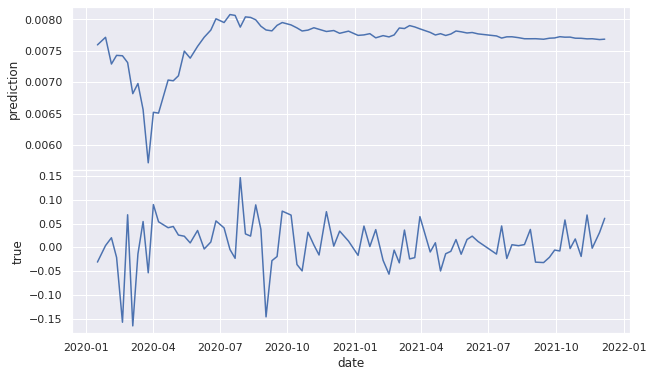

In [ ]:
fig,axs=plt.subplots(2,1,sharex=True,figsize=(10,6))
axs[0].plot(Y_test.index,grid_search.predict(X_test.values))
axs[0].set_ylabel("prediction")
axs[1].plot(Y_test.index,Y_test)
axs[1].set_ylabel("true")
plt.subplots_adjust(hspace=0)
plt.xlabel('date')
plt.show()
plt.close()

(85,)


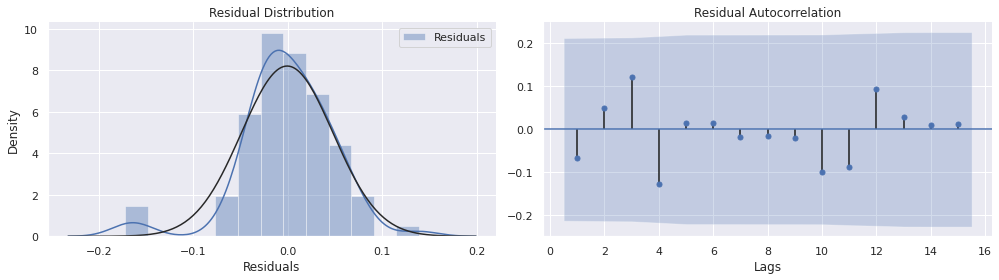

In [ ]:
true_y = Y_test
pred_y = grid_search.predict(X_test.values)
print(pred_y.shape)
residuals = np.subtract(true_y, pred_y.reshape(-1,1))
from scipy.stats import norm
from statsmodels.graphics.tsaplots import plot_acf
fig, axes = plt.subplots(ncols=2, figsize=(14,4))
sns.distplot(residuals, fit=norm, ax=axes[0], axlabel='Residuals', 
label='Residuals')
axes[0].set_title('Residual Distribution')
axes[0].legend()
plot_acf(residuals, lags=15, zero=False, ax=axes[1], title='Residual Autocorrelation')
axes[1].set_xlabel('Lags')
sns.despine()
fig.tight_layout()
#plt.show()

<a id='4.2'></a>
## 4.4. Test Options and Evaluation Metrics

In [ ]:
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

<a id='4.3'></a>
## 4.5. Compare Models and Algorithms

##### Regression and Tree Regression algorithms

In [ ]:
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

##### Neural Network algorithms

In [ ]:
models.append(('MLP', MLPRegressor()))

##### Ensable Models

In [ ]:
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

Once we have selected all the models, we loop over each of them. First we run the K-fold analysis. Next we run the model on the entire training and testing dataset.

In [ ]:
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.001391 (0.000761) 0.001151 0.003363
LASSO: 0.001216 (0.000652) 0.001210 0.002373
EN: 0.001216 (0.000652) 0.001210 0.002373
KNN: 0.001491 (0.000673) 0.001022 0.002854
CART: 0.002397 (0.000920) 0.000000 0.007351
SVR: 0.001427 (0.000711) 0.001346 0.005760
MLP: 0.010785 (0.011125) 0.003399 2.917295
ABR: 0.001285 (0.000633) 0.000688 0.002822
GBR: 0.001502 (0.000743) 0.000245 0.004723
RFR: 0.001331 (0.000671) 0.000185 0.003338
ETR: 0.001295 (0.000648) 0.000000 0.003475


#### K Fold results

We being by looking at the K Fold results

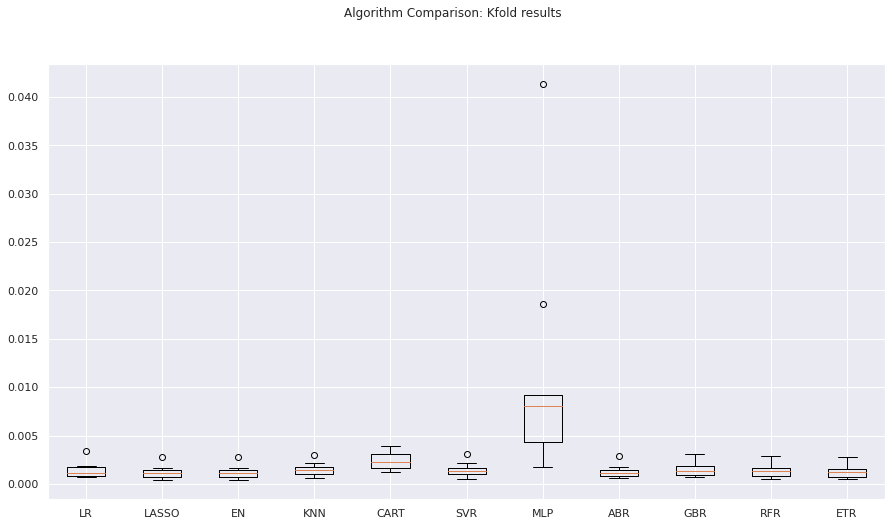

In [ ]:
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

We see the linear regression and the regularized regression including the Lasso regression (LASSO) and elastic net (EN) seem to do a good job.

#### Training and Test error

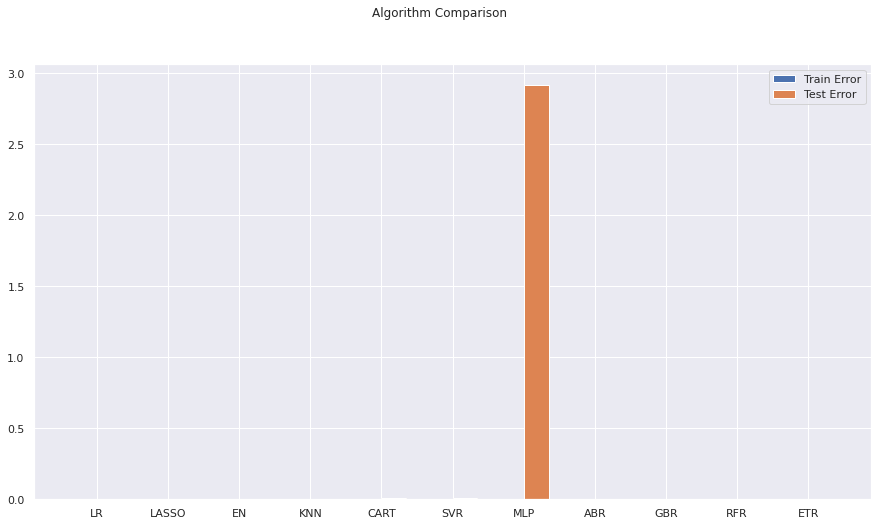

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

Looking at the training and test error, we still see a better performance of the linear models. Some of the algorithms, such as the decision tree regressor (CART) overfit on
the training data and produced very high error on the test set and these models
should be avoided. Ensemble models, such as gradient boosting regression (GBR) and
random forest regression (RFR) have low bias but high variance. We also see that the
artificial neural network (shown as MLP is the chart) algorithm shows higher errors
both in training set and test set, which is perhaps due to the linear relationship of the
variables not captured accurately by ANN or improper hyperparameters or insuffi‐
cient training of the model.

<a id='4.3.1'></a>
### Time Series based models-ARIMA and LSTM

Let us first prepare the dataset for ARIMA models,
by having only the correlated varriables as exogenous variables.

### Time Series Model - ARIMA Model

In [ ]:
X_train_ARIMA=X_train.loc[:, ['IBM', 'FB', 'DXS.AX', 'USDJPY=X', 'DJI', '^GSPC']]
X_test_ARIMA=X_test.loc[:, ['IBM', 'FB', 'DXS.AX', 'USDJPY=X', 'DJI', '^GSPC']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

In [ ]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.002391612397004102

###Time Series Model - SARIMA Model

After we remove the seasonality, the series seems much better, we are going to use pmdarima now, "guessing" that the seasonal parameter m=24 hours since we have hourly data.
Therefore, since difference is required and the seasonality is exist, the Seasonal Arima model shoul d be performed. We are going to find the order of SARIMA by using auto_arima function in order to minmize the AIC to find the best order. 

In [ ]:
X_train_SARIMA=X_train.loc[:, ['IBM', 'FB', 'DXS.AX', 'USDJPY=X', 'DJI', '^GSPC']]
X_test_SARIMA=X_test.loc[:, ['IBM', 'FB', 'DXS.AX', 'USDJPY=X', 'DJI', '^GSPC']]
tr_len_SARIMA = len(X_train_SARIMA)
te_len_SARIMA = len(X_test_SARIMA)
to_len_SARIMA = len (X)

In [ ]:
m=24
model = pm.auto_arima(Y_train, start_p=1, start_q=1,
                      test='adf',       # use adftest to find optimal 'd'
                      max_p=2, max_q=2, # maximum p and q
                      m=m,              # frequency of series = 1 if no seasonality
                      d=None,           # d=0 if no first-differencing is necessary
                      seasonal=True,    #Seasonality = False if no seasonality
                      start_P=0, 
                      D=1,              #D=0 if no seasonal differencing is necessary
                      trace=True,
                      error_action='ignore',  
                      suppress_warnings=True, 
                      stepwise=True)

print(model.summary())

Performing stepwise search to minimize aic
 ARIMA(1,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=13.16 sec
 ARIMA(0,0,0)(0,1,0)[24] intercept   : AIC=-1026.003, Time=0.20 sec
 ARIMA(1,0,0)(1,1,0)[24] intercept   : AIC=-1102.667, Time=11.39 sec
 ARIMA(0,0,1)(0,1,1)[24] intercept   : AIC=inf, Time=9.45 sec
 ARIMA(0,0,0)(0,1,0)[24]             : AIC=-1027.970, Time=0.18 sec
 ARIMA(1,0,0)(0,1,0)[24] intercept   : AIC=-1024.157, Time=0.67 sec
 ARIMA(1,0,0)(2,1,0)[24] intercept   : AIC=-1131.765, Time=25.70 sec
 ARIMA(1,0,0)(2,1,1)[24] intercept   : AIC=-1153.575, Time=39.81 sec
 ARIMA(1,0,0)(1,1,1)[24] intercept   : AIC=inf, Time=16.31 sec
 ARIMA(1,0,0)(2,1,2)[24] intercept   : AIC=-1154.086, Time=41.09 sec
 ARIMA(1,0,0)(1,1,2)[24] intercept   : AIC=inf, Time=37.94 sec
 ARIMA(0,0,0)(2,1,2)[24] intercept   : AIC=inf, Time=37.09 sec
 ARIMA(2,0,0)(2,1,2)[24] intercept   : AIC=-1152.192, Time=50.01 sec
 ARIMA(1,0,1)(2,1,2)[24] intercept   : AIC=-1152.060, Time=49.02 sec
 ARIMA(0,0,1)(2,1,2)[24] 

now we are going to take the parameters from pmdarima and instantiate a SARIMAX model (best_model), we firstly feeding it these parameters and take the residuals from running the model on the orginal data and make sure the residuals behave like white noise: centered around zero(mean of zero), mean reverting and with little or no autocorrelation in between. We can do the diagnostic later.

In [ ]:
p=model.order[0]
d=model.order[1]
q=model.order[2]
if model.seasonal_order != None:
    P = model.seasonal_order[0]
    D = model.seasonal_order[1]
    Q = model.seasonal_order[2]
    s = model.seasonal_order[3]
else:
    P=0
    D=0
    Q=0
    s=0

In [ ]:
print("model order", model.order)
print("model order1", p)
print("model order2", d)
print("model order3", q)
print("seasonal model order1", P)
print("seasonal model order2", D)
print("seasonal model order3", Q)
print("seasonal model order4", s)

model order (1, 0, 0)
model order1 1
model order2 0
model order3 0
seasonal model order1 2
seasonal model order2 1
seasonal model order3 2
seasonal model order4 24


In [ ]:
import statsmodels.api as sm
best_model=sm.tsa.statespace.SARIMAX(endog=Y_train,exog=X_train_SARIMA, order=(p, d, q), 
                                        seasonal_order=(P, D, Q, s)).fit(disp=-1)

In [ ]:
best_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                                 Statespace Model Results                                 
==========================================================================================
Dep. Variable:                               AAPL   No. Observations:                  336
Model:             SARIMAX(1, 0, 0)x(2, 1, 2, 24)   Log Likelihood                 586.540
Date:                            Tue, 21 Dec 2021   AIC                          -1149.080
Time:                                    06:54:20   BIC                          -1104.164
Sample:                                         0   HQIC                         -1131.129
                                            - 336                                         
Covariance Type:                              opg                                         
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
IBM           -0.0786      0.064     -1.222      0.222      -0.205       0.047
FB            -0.0028      0.039     -0.072      0.943      -0.080       0.074
DXS.AX         0.0548      0.087      0.633      0.527      -0.115       0.224
USDJPY=X      -0.0846      0.176     -0.480      0.631      -0.430       0.261
DJI           -0.3659      0.498     -0.735      0.462      -1.342       0.610
^GSPC          0.2045      0.505      0.405      0.686      -0.786       1.195
ar.L1          0.1099      0.068      1.625      0.104      -0.023       0.242
ar.S.L24      -0.7458      0.348     -2.145      0.032      -1.427      -0.064
ar.S.L48      -0.1259      0.099     -1.274      0.203      -0.320       0.068
ma.S.L24      -0.0816      0.340     -0.240      0.810      -0.747       0.584
ma.S.L48      -0.5530      0.319     -1.736      0.083      -1.177       0.071
sigma2         0.0012   8.79e-05     14.188      0.000       0.001       0.001
===================================================================================
Ljung-Box (Q):                       29.40   Jarque-Bera (JB):                13.08
Prob(Q):                              0.89   Prob(JB):                         0.00
Heteroskedasticity (H):               1.10   Skew:                             0.10
Prob(H) (two-sided):                  0.63   Kurtosis:                         3.98
===================================================================================

Warnings:
[1] Covariance matrix calculated using the outer product of gradients (complex-step).
"""

In [ ]:
error_Training_SARIMA = mean_squared_error(Y_train, best_model.fittedvalues)
predicted_sarima = best_model.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_SARIMA)[1:]
error_Test_SARIMA = mean_squared_error(Y_test,predicted_sarima)
error_Test_SARIMA

0.002519332856984507

Before we are doing the forecasting, the fitment of the model needed to be determinated, we can check the model fit by applying the diagnostics on model's residuals. To be more specific, we want to make sure that the model's residual are zero mean, constant variance and their auto-covariance only depends on time. In other word, we want the residuals are behaving like white noise and this can be done by using the Lijun-box test.

###Firstly, lets plot the residual to see if they have zero mean with constant variance. 

Text(0.5, 1.0, 'SARIMAX residuals for our stock data')

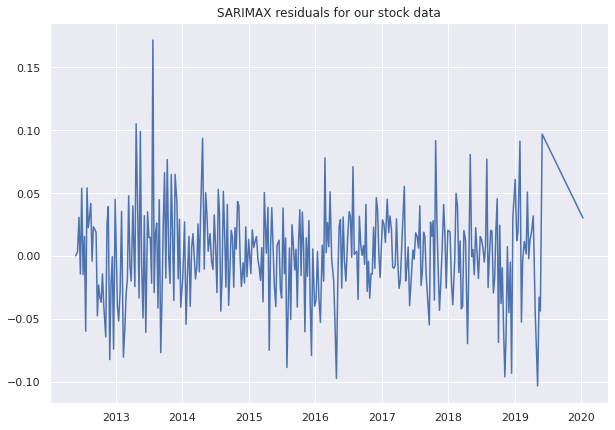

In [ ]:
fig, ax = plt.subplots(figsize=(10, 7))
idx = 0
residuals = pd.DataFrame(best_model.resid)
ax.plot(residuals)

plt.title('SARIMAX residuals for our stock data')

###Secondly, check the distribution of the residuals and see if they are normal distributed, 

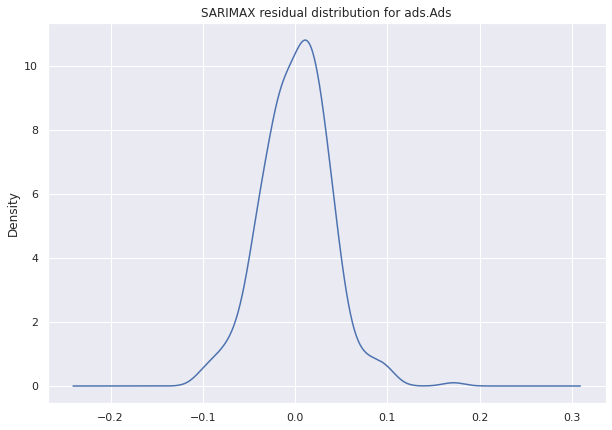

In [ ]:
residuals.plot(kind='kde',
               figsize=(10,7),
               title='SARIMAX residual distribution for ads.Ads', legend=False)

In [ ]:
result = adfuller(best_model.resid)
print('ADF Statistic: %f' % result[0])
print('p-value: %f' % result[1])

ADF Statistic: -5.382845
p-value: 0.000004


###As we mentioned before, the last but not the least thing is Ljung-box test, where the orignal Null hypothesis(H0): The residuals behave like white noise(strictly stationary) vs Alternative hypothesis(Ha): Otherwise(The residuals is not stationary). Since our p-value here is significantly larger than 0.05 so we are fail to reject the Null hypothesis and where we can say our residuals are behaving like white noise.
###By the four tests, our model has a good fit according to the residuals. 

In [ ]:
sms.diagnostic.acorr_ljungbox(best_model.resid, lags=[100], boxpierce=False)

(array([80.7632145]), array([0.92085197]))

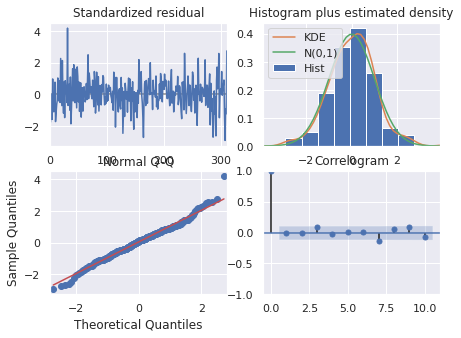

In [ ]:
best_model.plot_diagnostics(figsize=(7,5))
plt.show()

In [ ]:
def mean_absolute_percentage_error(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

#####Now let us try to predict without other asset as regressors.

In [ ]:
from pmdarima.arima import ARIMA
bestmodel = ARIMA(order=(0, 0, 1), seasonal_order=(2, 1, 2, 24))
bestmodel.fit(Y_train)

ARIMA(order=(0, 0, 1), seasonal_order=(2, 1, 2, 24))

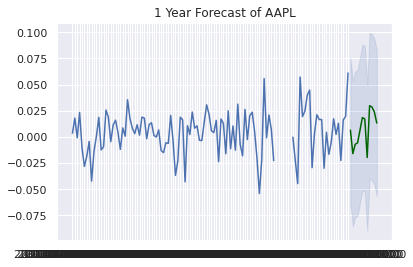

In [ ]:
apl = Y.resample('MS').mean()
apl.index = apl.index.map(str)
n_periods = 12
fc, confint = bestmodel.predict(n_periods=n_periods, return_conf_int=True)
index_of_fc = np.arange(len(apl), len(apl)+n_periods)

# make series for plotting purpose
fc_series = pd.Series(fc, index=index_of_fc)
lower_series = pd.Series(confint[:, 0], index=index_of_fc)
upper_series = pd.Series(confint[:, 1], index=index_of_fc)

# Plot
plt.plot(apl)
plt.plot(fc_series, color='darkgreen')
plt.fill_between(lower_series.index,
lower_series,
upper_series,
color='b', alpha=.15)
plt.title("1 Year Forecast of AAPL")
plt.show()

###  LSTM Model

In [ ]:
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]


In [ ]:
# Lstm Network
from keras.layers import Activation, Dense
from tensorflow.keras.optimizers import SGD
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)

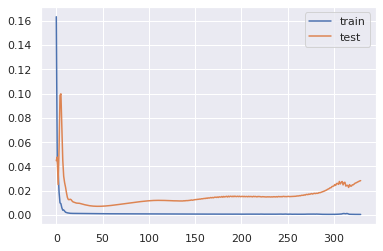

In [ ]:
#Visual plot to check if the error is reducing
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [ ]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

#### Append to previous results

In [ ]:
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")

## Overall Comparison of all the algorithms ( including Time Series Algorithms)

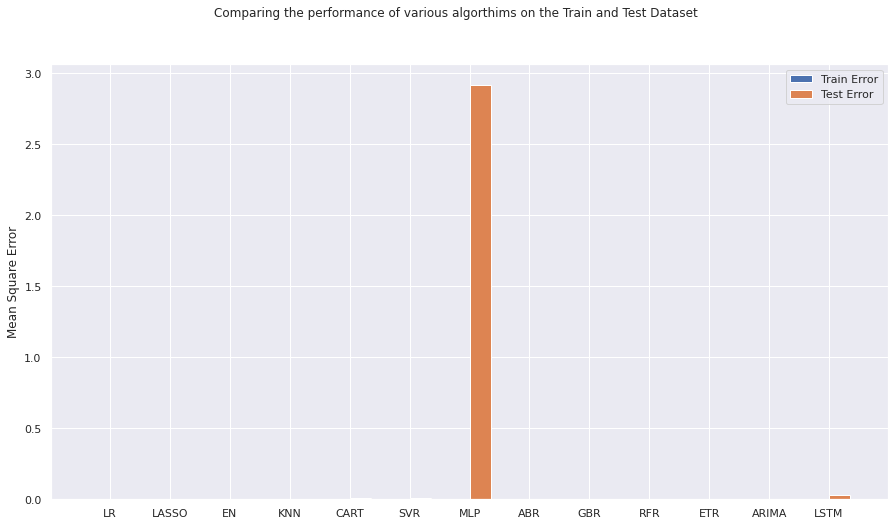

In [ ]:
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

Looking at the chart above, we find time series based ARIMA model comparable to
the linear supervised-regression models such as Linear Regression (LR), Lasso Regres‐
sion (LASSO) and Elastic Net (EN). This can primarily be due to the strong linear
relationship as discussed before. The LSTM model performs decently, however,
ARIMA model outperforms the LSTM model in the test set. Hence, we select the
ARIMA model for the model tuning.

<a id='5'></a>
# 5. Model Tuning and Grid Search

As shown in the chart above the ARIMA model is one of the best mode, so we perform the model tuning of the ARIMA model. The default order of ARIMA model is [1,0,0]. We perform a grid search with different combination p,d and q in the ARIMA model's order.  

In [ ]:
from statsmodels.tsa.arima_model import ARIMA
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)   

ARIMA(0, 0, 0) MSE=0.0011937
ARIMA(0, 0, 1) MSE=0.0011820
ARIMA(1, 0, 0) MSE=0.0011830
ARIMA(1, 0, 1) MSE=0.0011801
ARIMA(2, 0, 0) MSE=0.0011816
ARIMA(2, 0, 1) MSE=0.0011801
Best ARIMA(2, 0, 1) MSE=0.0011801


In [ ]:
#Grid Search for SARIMA Model
#Change p,d and q, P,D,Q, S and check for the best result

# evaluate an SARIMA model for a given order (p,d,q,P,D,Q,S)
#Assuming that the train and Test Data is already defined before
def evaluate_sarima_model(reg_order,sea_order):
    #predicted = list()     
    modelSARIMA=sm.tsa.statespace.SARIMAX(endog=Y_train,exog=X_train_SARIMA, order=reg_order, 
                                        seasonal_order=sea_order).fit(disp=-1)
    error = mean_squared_error(Y_train, modelSARIMA.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values,S_value): 
    best_score, best_order, best_sea = float("inf"), None, None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                reg_order = (p,d,q)
                for P in p_values:
                    for D in d_values:
                        for Q in q_values: 
                            for S in S_value:
                                sea_order = (P,D,Q,S)
                                try:
                                    mse = evaluate_sarima_model(reg_order,sea_order)                    
                                    if mse < best_score:
                                        best_score, best_order, best_sea= mse, reg_order,sea_order
                                    print('ARIMA%s MSE=%.7f' % (reg_order,sea_order,mse))
                                except:
                                    continue
    print('Best SARIMA%s%s MSE=%.7f' % (reg_order,sea_order, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
S_value = range(0,2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values,S_value)  

Best SARIMA(2, 1, 1)(2, 1, 1, 1) MSE=0.0011873


<a id='6'></a>
# 6. Finalise the Model

<a id='6.1'></a>
## 6.1. Results on the Test Dataset

In [ ]:
# prepare model
from statsmodels.tsa.arima_model import ARIMA
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()

In [ ]:
# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.002391612397004102


In [ ]:
# estimate accuracy on validation set for SARIMA(method1)
predicted_sarima = best_model.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_SARIMA)[1:]
print(mean_squared_error(Y_test,predicted_sarima))

0.002519332856984507


In [ ]:
# prepare model for SARIMA(method2)
modelSARIMA_tuned=sm.tsa.statespace.SARIMAX(endog=Y_train,exog=X_train_SARIMA, order=(2,1,1), 
                                        seasonal_order=(2, 1, 1, 24)).fit(disp=-1)

In [ ]:
# estimate accuracy on validation set for SARIMA(method2)
predicted_sarima_tuned = modelSARIMA_tuned.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_SARIMA)[1:]
print(mean_squared_error(Y_test,predicted_sarima_tuned))

0.0025510501887418243


After tuning the model and picking the best SARIMA model or the order 2,1,1,2,1,1,24 we select this model and can it can be used for the modeling/forcasting purpose since it has lower test error compared to ARIMA(2,0,1) and SARIMA order resulting from auto_arima(method 1).

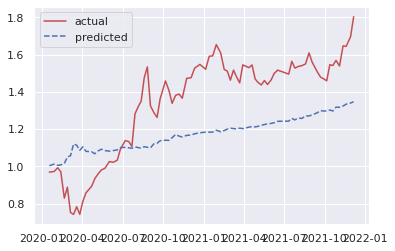

In [ ]:
# plotting the actual data versus predicted data
predicted_tuned.index = Y_test.index 
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual',)
# plotting t, a separately
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b--', label='predicted') 
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.show()

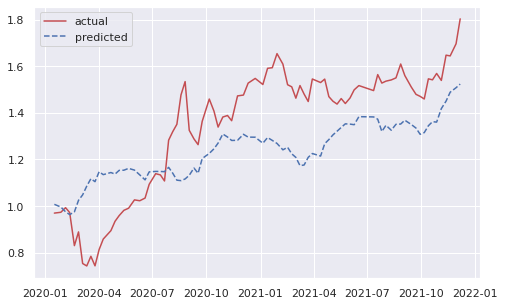

In [ ]:
# plotting the actual data versus predicted data using sarima(method1-AIC)
predicted_sarima.index = Y_test.index 
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual',)
# plotting t, a separately
pyplot.plot(np.exp(predicted_sarima).cumprod(), 'b--', label='predicted') 
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.show()

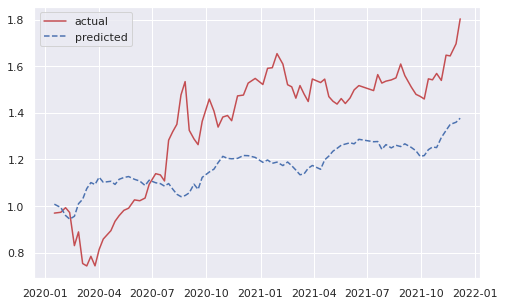

In [ ]:
# plotting the actual data versus predicted data using sarima(method2-Grid Search)
predicted_sarima_tuned.index = Y_test.index 
pyplot.plot(np.exp(Y_test).cumprod(), 'r', label='actual',)
# plotting t, a separately
pyplot.plot(np.exp(predicted_sarima_tuned).cumprod(), 'b--', label='predicted') 
pyplot.legend()
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.show()

<a id='6.2'></a>
## 6.2. Save Model for Later Use

In [ ]:
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model_fit_tuned, open(filename, 'wb'))

In [ ]:
#Use the following code to produce the comparison of actual vs. predicted
# predicted_tuned.index = Y_test.index
# pyplot.plot(np.exp(Y_test).cumprod(), 'r') # plotting t, a separately
# pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b')
# pyplot.rcParams["figure.figsize"] = (8,5)
# pyplot.show()

### Summary

We can conclude that simple models - linear regression, regularized regression (i.e.
Lasso and elastic net) - along with the time series model such as ARIMA are promis‐
ing modelling approaches for asset price prediction problem. These models can
enable financial practitioners to model time dependencies with a very flexible
approach. The overall approach presented in this case study may help us encounter
overfitting and underfitting which are some of the key challenges in the prediction
problem in finance.
We should also note that we can use better set of indicators, such as P/E ratio, trading
volume, technical indicators or news data, which might lead to better results. We will
demonstrate this in some of the case studies in the book.
Overall, we created a supervised-regression and time series modelling framework
which allows us to perform asset class prediction using historical data to generate
results and analyze risk and profitability before risking any actual capital.